In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's look at an example with a Markov Chain with the following transition matrix:

In [20]:
A = np.tile([.5,.3,.2],3).reshape((3,3))
A

array([[0.5, 0.3, 0.2],
       [0.5, 0.3, 0.2],
       [0.5, 0.3, 0.2]])

And the following observation matrix and sample transition matrix:

In [21]:
O = np.array([[14,17,12],
              [38,15,20],
              [43,31,17]])
A_hat = O / np.tile(O.sum(axis=1),3).reshape((3,3)).transpose()
A_hat

array([[0.3255814 , 0.39534884, 0.27906977],
       [0.52054795, 0.20547945, 0.2739726 ],
       [0.47252747, 0.34065934, 0.18681319]])

How unusual is this in likelihood? Can we reject $H_0$ that this sequence is sequentially independent ? Let's pick a alpha value of $\alpha = .05$ and simulate how likely this is by using a Likelihood Ratio Test:

In [22]:
def sts(O,A,A_hat):
    return -2*np.sum(O*np.log(A/A_hat))
ts = sts(O,A,A_hat)
print(ts)

10.364368488739826


Let's simulate the result:

In [27]:
simsize = 10000
ts_values = np.zeros(simsize)

#function for a markov chain simulation
def dtmc(n,A,c,x0=None):
    m = A.shape[0]
    x = np.zeros(n,dtype=int)
    if x0 is None:
        prob = c
        x0 = np.random.choice(m,size=1,p=prob)
    x[0] = int(x0)
    prev = x[0]
    for i in range(1,n):
        prob = A[prev,:]
        x[i] = np.random.choice(m,size=1,p=prob)
        prev = x[i]
    return x
    
#sample matrix constructor
def observation_matrix(A,x):
    m = len(x)-1
    c = A.shape[0]
    O = np.zeros((c,c))
    for t in range(m):
        for i in range(c):
            if x[t] == i:
                for j in range(c):
                    if x[t+1] == j:
                        O[i,j] += 1
    return O

#test 1
c = A.shape[0]
p = np.ones(c)/c
x = dtmc(10,A,p)
print(x)
#test 2
print(observation_matrix(A,x))

[2 0 1 0 0 2 1 0 2 0]
[[1. 1. 2.]
 [2. 0. 0.]
 [2. 1. 0.]]


Ok, let's do a simulation now to test for beta:

C:\Users\Sebastian\Anaconda3plus\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Sebastian\Anaconda3plus\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


(array([ 64., 193., 348., 529., 570., 678., 690., 734., 667., 729., 650.,
        554., 510., 448., 425., 359., 274., 281., 182., 187., 162., 129.,
        104., 103.,  70.,  53.,  58.,  47.,  47.,  24.,  26.,  15.,  11.,
         17.,   6.,  14.,   7.,   6.,   6.,   2.,   6.,   0.,   1.,   2.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.2130476 ,  0.75531709,  1.29758657,  1.83985605,  2.38212554,
         2.92439502,  3.4666645 ,  4.00893399,  4.55120347,  5.09347295,
         5.63574244,  6.17801192,  6.7202814 ,  7.26255089,  7.80482037,
         8.34708985,  8.88935934,  9.43162882,  9.9738983 , 10.51616779,
        11.05843727, 11.60070675, 12.14297624, 12.68524572, 13.2275152 ,
        13.76978469, 14.31205417, 14.85432365, 15.39659314, 15.93886262,
        16.4811321 , 17.02340159, 17.56567107, 18.10794055, 18.65021004,
        19.19247952, 19.734749  , 20.27701849, 20.81928797, 21.36155745,
        21.90382694, 22.44609642, 22.9883659 , 23.53063539, 24.07290487,
 

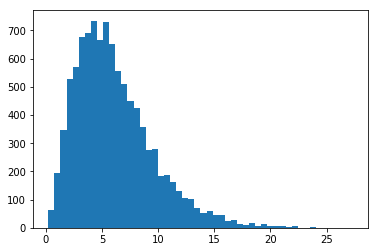

In [30]:
n = np.sum(O) + 1
#function to simulate samples
def simulate_mcs(simsize,n,A,B):
    test_stat = np.zeros(simsize)
    c = A.shape[0]
    p = np.ones(c)/c
    for i in range(simsize):
        x = dtmc(n,B,p)
        O = observation_matrix(A,x)
        A_hat = O / np.tile(O.sum(axis=1),c).reshape((c,c)).transpose()
        test_stat[i] = sts(O,A,A_hat)
    return test_stat
test_stat = simulate_mcs(simsize,n,A,A)
plt.hist(test_stat,bins=50)

Since our null model has 3-1 = 2 degrees of freedom and our full model has $3^2 - 1$ = 8 degrees of freedom, then this should be distributed according to a $\chi_{df=8-2=6}^2$ distribution:

(array([ 91., 231., 445., 588., 688., 745., 772., 787., 730., 684., 591.,
        559., 492., 424., 372., 271., 273., 225., 187., 146., 128., 112.,
         85.,  72.,  58.,  51.,  47.,  28.,  32.,  16.,  10.,   7.,  16.,
          3.,   8.,   7.,   5.,   5.,   2.,   2.,   0.,   1.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.23437633,  0.80422692,  1.37407751,  1.94392811,  2.5137787 ,
         3.08362929,  3.65347988,  4.22333048,  4.79318107,  5.36303166,
         5.93288226,  6.50273285,  7.07258344,  7.64243404,  8.21228463,
         8.78213522,  9.35198582,  9.92183641, 10.491687  , 11.06153759,
        11.63138819, 12.20123878, 12.77108937, 13.34093997, 13.91079056,
        14.48064115, 15.05049175, 15.62034234, 16.19019293, 16.76004353,
        17.32989412, 17.89974471, 18.4695953 , 19.0394459 , 19.60929649,
        20.17914708, 20.74899768, 21.31884827, 21.88869886, 22.45854946,
        23.02840005, 23.59825064, 24.16810124, 24.73795183, 25.30780242,
 

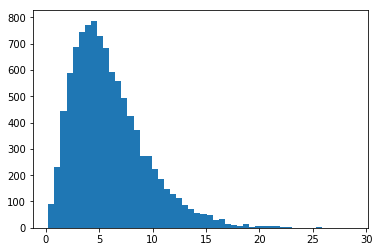

In [29]:
import scipy.stats as ss
plt.hist(ss.chi2(df=6).rvs(size=simsize),bins=50)

Let's look at where this p-value and critical region is:

In [63]:
np.sort(test_stat)[9500]

12.886883192913714

So in this case, we would NOT reject the test statistic. In this case, we want to find some index that's sorted such that our p-value is close to that value:

In [68]:
np.sort(test_stat)[8830]

10.359815368473209

So our p-value here is roughly 1-.883 = .117. 

In [69]:
ss.chi2(df=6).ppf(.95)

12.591587243743977

So this is relatively close to the desired distribution. 

In [70]:
np.sort(test_stat)[9900]

17.220592648903857

In [71]:
ss.chi2(df=6).ppf(.99)

16.811893829770927

So would this imply that Wilk's Theorem applies to something like statistical testing for sequential independence ? Maybe. Now, what about statistical power?

(array([ 11.,  21.,  42.,  89., 150., 213., 334., 375., 484., 540., 601.,
        639., 652., 604., 677., 606., 592., 532., 464., 417., 373., 290.,
        249., 205., 194., 162.,  85.,  94.,  59.,  66.,  43.,  32.,  23.,
         22.,  21.,   8.,   7.,   4.,   2.,   5.,   2.,   3.,   2.,   0.,
          1.,   1.,   1.,   2.,   0.,   1.]),
 array([ 2.02726866,  3.32128411,  4.61529956,  5.909315  ,  7.20333045,
         8.4973459 ,  9.79136135, 11.0853768 , 12.37939224, 13.67340769,
        14.96742314, 16.26143859, 17.55545403, 18.84946948, 20.14348493,
        21.43750038, 22.73151583, 24.02553127, 25.31954672, 26.61356217,
        27.90757762, 29.20159306, 30.49560851, 31.78962396, 33.08363941,
        34.37765486, 35.6716703 , 36.96568575, 38.2597012 , 39.55371665,
        40.84773209, 42.14174754, 43.43576299, 44.72977844, 46.02379389,
        47.31780933, 48.61182478, 49.90584023, 51.19985568, 52.49387112,
        53.78788657, 55.08190202, 56.37591747, 57.66993292, 58.96394836,
 

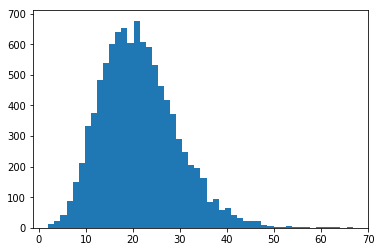

In [72]:
test_stat2 = simulate_mcs(simsize,n,A,A_hat)
plt.hist(test_stat2,bins=50)